In [69]:
import matplotlib.pyplot as plt
import pandas as pd

#Loss - when  we use linear regression to make predictions there will be an 
#aggregate "loss". This is basically how far from the prediction the actual value is

In [70]:
x=[1,2,3];y=[5,1,3]
m1=1;b1=0

m2=0.5;b2=1

y_prediction1=[x*m1+b1 for x in x]
y_prediction2=[x*m2+b2 for x in x]
total_loss1=0
total_loss2=0

for i in range(len(y)):
    acc_value=y[i]
    pred1=y_prediction1[i]
    pred2=y_prediction2[i]
    total_loss1 += (acc_value-pred1)**2
    total_loss2 += (acc_value-pred2) **2

print(total_loss1, total_loss2)

17 13.5


As we can see from the above example, the loss is less with the parameters from the second

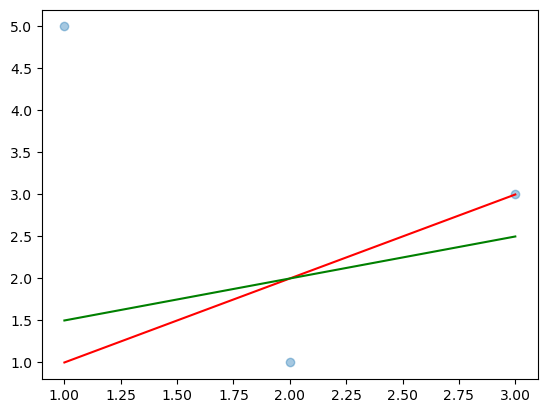

In [71]:
plt.scatter(x,y, alpha=0.4)
plt.plot(x, y_prediction1, 'red')
plt.plot(x, y_prediction2, 'green')

plt.show()

Above we have the two different prediction lines. The green is the second prediction line. It doesn't appear much better. This is because there are few data points and they  are spread far apart.

The goal of linear regression algorithms is to find the best parameters for the slope (m) and the y intercept (b). By doing this we will find a line or linear continuum that best describes our data. I.e. it will have less loss

To find the best b (y intercept) we can use the following equation: 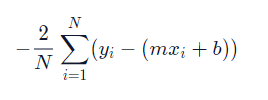

N is the number of records in the dataset
M is the current gradient guess
b is the current intercept guess

1. We find the sum of the y_val - (m*x_val+b) for all y values and x values
2. We then multiply the sum by a factor of -2/N

In [72]:
def get_gradient_at_b(x,y,m,b):
    diff=0
    for i in range(len(x)):
        diff+= y[i]-(m*x[i]+b)
    b_gradient= -2/len(y)*diff
    return b_gradient

To find the slope (m gradient) we can use the following formula
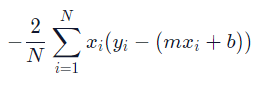

1. We find the sum of the x_value * (y_value - (m*x_value +b))
2. Then we multiply the sum of a factor of -2/N

In [73]:
def get_gradient_at_m(x,y,m,b):
    N=len(x)
    diff=0

    for i in range(N):
        diff += x[i] * (y[i] - (m*x[i]+b))
    
    m_gradient=-2/N * diff
    return m_gradient

Making a step

Now that we know the gradient (see the reducing loss diagram) we can make a step in that direction.

But we don't want to make too big a step because we might miss the optimal position.
If we move by too little then it will take too much processing power/time for us to reach the optimal value.

we can find a new b value: new_b=current_b-(learning_rate*b-gradient)

b_gradient is the gradient on the parabola (see reducing loss)

Learning rate is the proportional to the size of the step we want to take.

In [74]:
def step_gradient(x,y,b_current, m_current, learning_rate):
    b_gradient=get_gradient_at_b(x,y,m_current,b_current)
    m_gradient=get_gradient_at_m(x,y,m_current,b_current)

    b=b_current-(learning_rate*b_gradient)
    m=m_current-(learning_rate*m_gradient)
    return [b,m]

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

b=0;m=0

b,m=step_gradient(months, revenue, b,m, 0.01)
print(b,m)

2.355 17.78333333333333


Above we have made one step but now we want keep stepping in the right direction

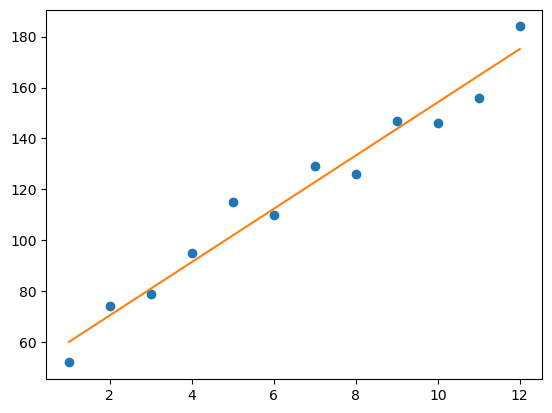

In [75]:
def gradient_descent(x,y,learning_rate, num_iterations):
    b=0;m=0
    for i in range(num_iterations):
        b,m=step_gradient(x,y,b,m,learning_rate)
    return [b,m]

b,m=gradient_descent(months, revenue, 0.01, 1000)

y=[m*x+b for x in months]

plt.plot(months, revenue, 'o')
plt.plot(months, y)
plt.show()

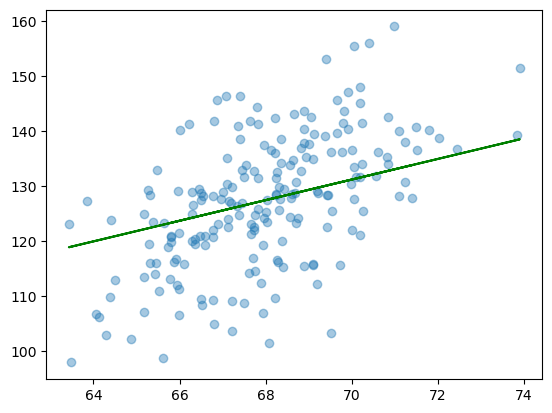

In [92]:
#Now lets use our functions on real data
df=pd.read_csv("heights.csv")
X=df.height
y=df.weight

plt.scatter(X,y,alpha=0.4)
b,m=gradient_descent(X,y,0.0001, 1000)
y_predictions=[x*m+b for x in X]
plt.plot(X,y_predictions, 'g')
plt.show()

In [77]:
import matplotlib.pyplot as plt
import pandas as pd



from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

boston = load_boston()

c:\Users\Code\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

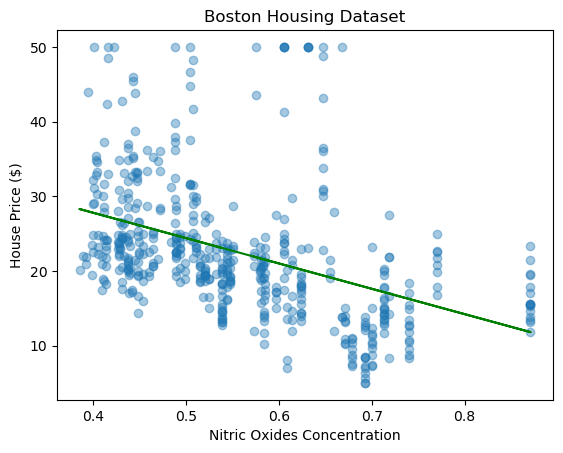

In [78]:
df = pd.DataFrame(boston.data, columns =boston.feature_names)

x= df[['NOX']]
y=boston.target

lr = LinearRegression()

lr.fit(x,y)
house_price_pred=lr.predict(x)

plt.scatter(x,y, alpha=0.4)
plt.plot(x, house_price_pred, 'green')
plt.title("Boston Housing Dataset")
plt.xlabel('Nitric Oxides Concentration')
plt.ylabel("House Price ($)")
plt.show()